<a href="https://colab.research.google.com/github/yraj1996/hotel_booking_anaysis-EDA/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#using pandas library and 'read_csv' function to read 
hotel_df=pd.read_csv("/content/drive/MyDrive/Hotel_booking(EDA) Project/Hotel Bookings.csv")
#examing head of Hotel Bookings csv file 
hotel_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [5]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
#amount of rows in given dataset.
len(hotel_df)

119390

In [7]:
hotel_df.shape

(119390, 32)

In [8]:
# It gives overall information about Hotel Booking dataframe(hotel_df).
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Hotel Booking dataset consist of 32 columns and 119390 rows which provide large amount of information for further exploration.

# Understanding,Wrangling and Cleaning the Data.

In [9]:
#step 1: Data cleaning by looking out and handling the missing values and replace those with integers.
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
#looking at duplicate values.
hotel_df[hotel_df.duplicated()].shape

(31994, 32)

In [11]:
#dropping duplicate values
hotel_df.drop_duplicates(inplace = True)

In [12]:
#replacing null value with int(0) in 'children' column:
hotel_df['children'].fillna(0,inplace=True)

hotel_df['children']=hotel_df['children'].astype(int)

In [13]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

In [14]:
#Column-wise null percentage
round(100*(hotel_df.isnull().sum()/len(hotel_df.index)),2)

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.52
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.95
company                           93.98


Here, null-value percentage of country column is very less. so we can ignore it. Column named 'company' which consist 94% null values and column 'agent' showing 13%, these both columns are irrelvent for further analysis.Hence, we drop these two column from our dataset.

In [15]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
hotel_df.drop(['agent','company',], axis=1, inplace=True)
#examing the changes
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [16]:
#let's proceed with categorical unique values
#examining the unique values of "hotel" column and try to find type of "hotel" and their % sharing in total number of hotels.
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [17]:
hotel_count=hotel_df['hotel'].value_counts()

In [18]:
hotel_count

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

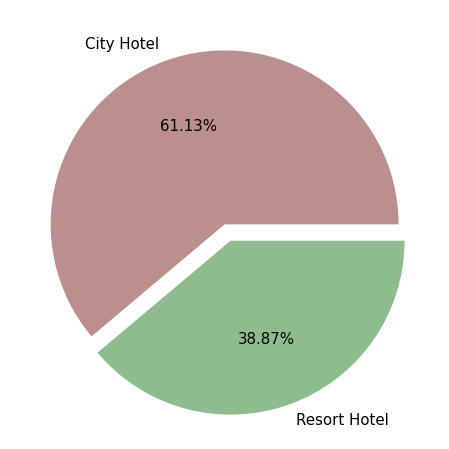

In [19]:
#overall booking sharing between hotel types.
plt.figure(figsize=(8,8))
plt.pie(hotel_count,labels=(hotel_df['hotel'].value_counts().index.tolist()),textprops={"fontsize":15},colors=['rosybrown', 'darkseagreen'],autopct='%2.2f%%',explode=(0,0.1))
plt.show()

#creating dataset for both hotel type

In [20]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [21]:
booking_df=hotel_df[hotel_df.is_canceled==0]
booking_df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
34415,Resort Hotel,0,0,2017,March,12,23,0,1,1,0,0,BB,PRT,Direct,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,60.0,0,1,Check-Out,2017-03-24


In [22]:
resorthotel_df=booking_df[booking_df.hotel=='Resort Hotel']
cityhotel_df=booking_df[booking_df.hotel=='City Hotel']

In [23]:
resorthotel_df["hotel"].value_counts()


Resort Hotel    25992
Name: hotel, dtype: int64

#creating new columns for further analysis 

In [26]:
#creating a column : "Total_stay"
hotel_df['Total_stay']=hotel_df.stays_in_week_nights+hotel_df.stays_in_weekend_nights

In [27]:
#creating a column : "Total_guest"
hotel_df['Total_guests']=hotel_df.adults + hotel_df.children
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_stay,Total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [28]:
# removing rows which contain total guests as Zero.
hotel_df=hotel_df[hotel_df['Total_guests'] > 0]
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_stay,Total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


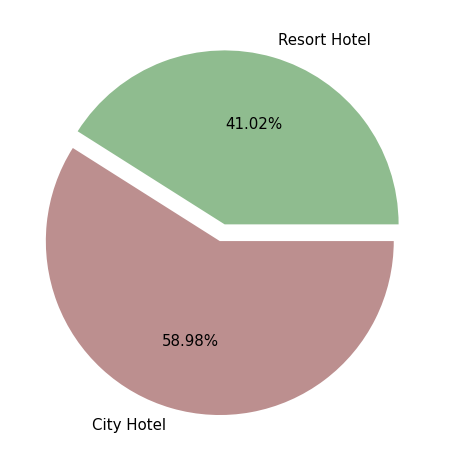

In [25]:
#now if we plot pie chart for hotel_type. when there is no cancelation.
hotel_type=[25992,37379]
plt.figure(figsize=(8,8))
plt.pie(hotel_type,labels=('Resort Hotel','City Hotel'),textprops={"fontsize":15},colors=[ 'darkseagreen','rosybrown',],autopct='%2.2f%%',explode=(0,0.1))
plt.show()

In [24]:
cityhotel_df['hotel'].value_counts()

City Hotel    37379
Name: hotel, dtype: int64

#</b>Exploratory Analysis and Visualization</b>

 **1. Visualizing Hotel wise yearly bookings**

In [53]:
#we can count the no of bookings made in each hotel and year by using groupby
booking_df.groupby('arrival_date_year')['hotel'].value_counts()

arrival_date_year  hotel       
2015               Resort Hotel     5480
                   City Hotel       5129
2016               City Hotel      18970
                   Resort Hotel    12213
2017               City Hotel      13280
                   Resort Hotel     8299
Name: hotel, dtype: int64

By using seaborn counterplot function we can easily groupby total no of booking in each hotel w.r.t  years

In [54]:
#using seaborn and matplotlib 
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']=(10,6)

Text(0.5, 1.0, 'Yearly bookings')

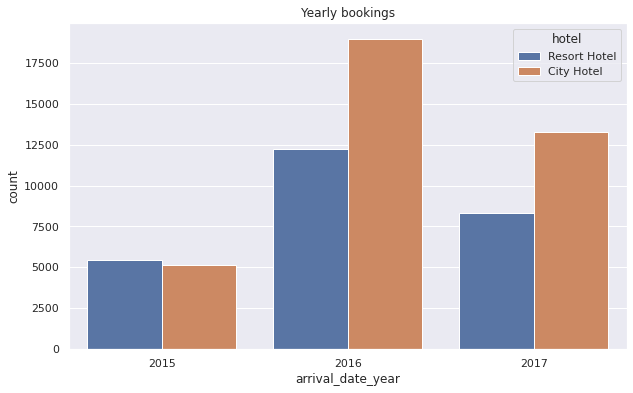

In [55]:
# Seaborn Countplot function creates bar charts of the number of observations per category.
sns.countplot(x='arrival_date_year',data=booking_df,hue='hotel').set_title('Yearly bookings')

from above bar plot we can see year wise bookings in City and Resort hotel.
Where bookings made into City hotel is higher than Resort hotel in each of following years

**2.From which country the most guests are booking hotel ?**

In [56]:
booking_df['country'].value_counts()

PRT    17662
GBR     8448
FRA     7104
ESP     5390
DEU     4334
       ...  
ZMB        1
SYC        1
MDG        1
SMR        1
FRO        1
Name: country, Length: 165, dtype: int64

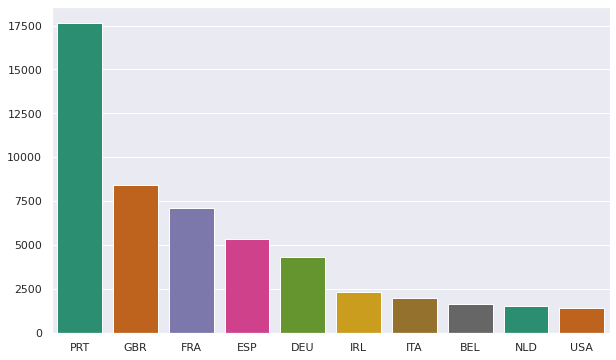

In [57]:
#plotting top 10 countries 
sns.barplot (y= list(booking_df.country.value_counts().head (10)), x= list(booking_df.country.value_counts().head(10).index),palette='Dark2')

visitors  from  Portugal,France, Great Britain, and Spain being the highest.

**3.Visualizing market segments wise bookings**

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

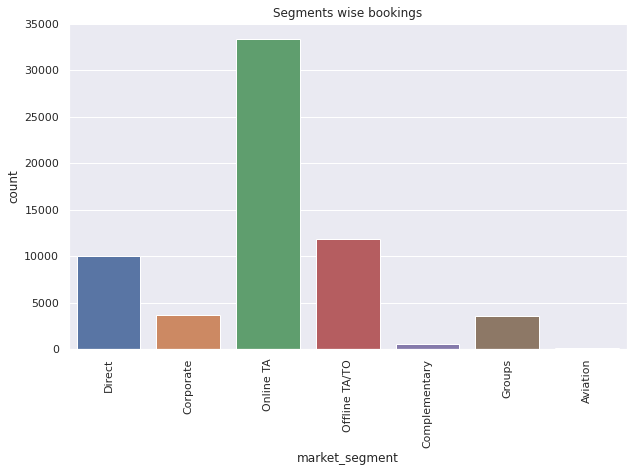

In [58]:
plt.title('Segments wise bookings')
sns.countplot(x='market_segment',data=booking_df)
plt.xticks(rotation = 90)

Bookings through online and offline travel agents are higher

**4.Distribution channel wise bookings**

Text(0.5, 1.0, 'Types of distribution channels')

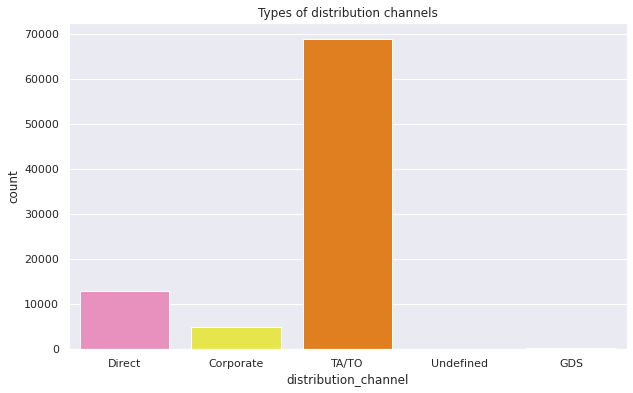

In [59]:
sns.countplot(data = hotel_df, x = 'distribution_channel',  palette='Set1_r')
plt.title('Types of distribution channels')

the travel agents whether online/offline have the highest distribution rates

**5.which customer type making most of bookings?**

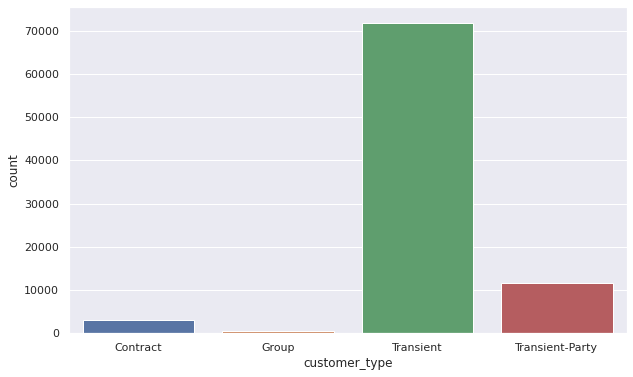

In [60]:
c=hotel_df.groupby("customer_type")['hotel'].describe()
c
sns.barplot(x=c.index, y=c["count"] )

*   Transient type customer make more bookings in comaprison to others.

**6.Visualizing percentage of monthly cancellation by customer_type**

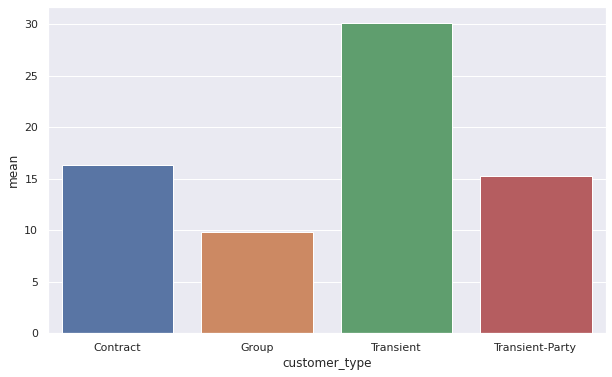

In [61]:
b=hotel_df.groupby("customer_type")['is_canceled'].describe()
sns.barplot(x=b.index, y=b["mean"] * 100)

*   Transient customer types have higher cancellations

**7.visualizing monthly bookings.**

In [62]:
#we are taking mean beacuse in 'August' and 'July' month there is data for 3 years.
month_df=hotel_df.groupby(['arrival_date_month','arrival_date_year']).count()
month_df

hotel  is_canceled  lead_time  \
arrival_date_month arrival_date_year                                  
April              2016                3767         3767       3767   
                   2017                4133         4133       4133   
August             2015                2447         2447       2447   
                   2016                4415         4415       4415   
                   2017                4380         4380       4380   
December           2015                1975         1975       1975   
                   2016                3137         3137       3137   
February           2016                2799         2799       2799   
                   2017                3284         3284       3284   
January            2016                1849         1849       1849   
                   2017                2836         2836       2836   
July               2015                1672         1672       1672   
                   2016                3842         3842       3842   
                   2017                4529         4529       4529   
June               2016                3515         3515       3515   
                   2017                4241         4241       4241   
March              2016                3825         3825       3825   
                   2017                3663         3663       3663   
May                2016                3777         3777       3777   
                   2017                4567         4567       4567   
November           2015                1662         1662       1662   
                   2016                3311         3311       3311   
October            2015                2694         2694       2694   
                   2016                4227         4227       4227   
September          2015                2834         2834       2834   
                   2016                3848         3848       3848   

                                      arrival_date_week_number  \
arrival_date_month arrival_date_year                             
April              2016                                   3767   
                   2017                                   4133   
August             2015                                   2447   
                   2016                                   4415   
                   2017                                   4380   
December           2015                                   1975   
                   2016                                   3137   
February           2016                                   2799   
                   2017                                   3284   
January            2016                                   1849   
                   2017                                   2836   
July               2015                                   1672   
                   2016                                   3842   
                   2017                                   4529   
June               2016                                   3515   
                   2017                                   4241   
March              2016                                   3825   
                   2017                                   3663   
May                2016                                   3777   
                   2017                                   4567   
November           2015                                   1662   
                   2016                                   3311   
October            2015                                   2694   
                   2016                                   4227   
September          2015                                   2834   
                   2016                                   3848   

                                      arrival_date_day_of_month  \
arrival_date_month arrival_date_year                              
April              2016                                    3767   

In [63]:
month_df1=month_df.groupby('arrival_date_month')['hotel'].mean()
month_df1

arrival_date_month
April        3950.000000
August       3747.333333
December     2556.000000
February     3041.500000
January      2342.500000
July         3347.666667
June         3878.000000
March        3744.000000
May          4172.000000
November     2486.500000
October      3460.500000
September    3341.000000
Name: hotel, dtype: float64

Text(0.5, 1.0, 'Arrivals per month')

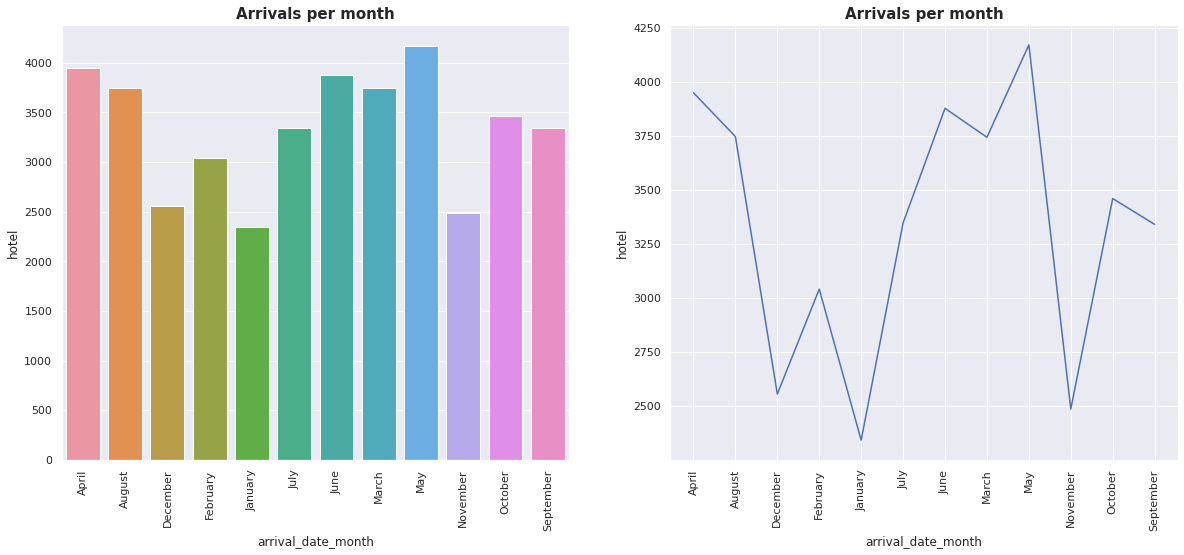

In [64]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=month_df1.index,y=month_df1)
plt.xticks(rotation = 90)
plt.title("Arrivals per month",fontweight="bold", size=15)
plt.subplot(1, 2, 2)
sns.lineplot(x=month_df1.index,y=month_df1)
plt.xticks(rotation = 90)
plt.title("Arrivals per month",fontweight="bold", size=15)

*   May,October,april are most busiest month as most no of guest arrive in these months.
*  we plot two chart 1. Bar plot 2.Line plot for better visualization and understanding.



**8.Let's try to analyse the total no of cancelation made in each month**

In [65]:
#first we make a dataframe which consist only bokkings wwhich were got cancelled.
cancel_df=hotel_df[hotel_df.is_canceled==1]
cancel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_stay,Total_guests
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,3,2
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,3,2
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23,4,2
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11,7,2
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29,10,2


In [66]:
cancel_month=cancel_df.groupby(['arrival_date_month','arrival_date_year']).count()
cancel_month

hotel  is_canceled  lead_time  \
arrival_date_month arrival_date_year                                  
April              2016                1013         1013       1013   
                   2017                1393         1393       1393   
August             2015                 571          571        571   
                   2016                1442         1442       1442   
                   2017                1609         1609       1609   
December           2015                 372          372        372   
                   2016                1005         1005       1005   
February           2016                 526          526        526   
                   2017                 886          886        886   
January            2016                 301          301        301   
                   2017                 736          736        736   
July               2015                 512          512        512   
                   2016                1088         1088       1088   
                   2017                1596         1596       1596   
June               2016                 911          911        911   
                   2017                1442         1442       1442   
March              2016                 885          885        885   
                   2017                 943          943        943   
May                2016                 941          941        941   
                   2017                1501         1501       1501   
November           2015                 243          243        243   
                   2016                 809          809        809   
October            2015                 440          440        440   
                   2016                1202         1202       1202   
September          2015                 565          565        565   
                   2016                1076         1076       1076   

                                      arrival_date_week_number  \
arrival_date_month arrival_date_year                             
April              2016                                   1013   
                   2017                                   1393   
August             2015                                    571   
                   2016                                   1442   
                   2017                                   1609   
December           2015                                    372   
                   2016                                   1005   
February           2016                                    526   
                   2017                                    886   
January            2016                                    301   
                   2017                                    736   
July               2015                                    512   
                   2016                                   1088   
                   2017                                   1596   
June               2016                                    911   
                   2017                                   1442   
March              2016                                    885   
                   2017                                    943   
May                2016                                    941   
                   2017                                   1501   
November           2015                                    243   
                   2016                                    809   
October            2015                                    440   
                   2016                                   1202   
September          2015                                    565   
                   2016                                   1076   

                                      arrival_date_day_of_month  \
arrival_date_month arrival_date_year                              
April              2016                                    1013   

In [67]:
#we are trying to get average value of cancellation in each month.
cancel_month1=cancel_month.groupby('arrival_date_month')['is_canceled'].mean()
cancel_month1

arrival_date_month
April        1203.000000
August       1207.333333
December      688.500000
February      706.000000
January       518.500000
July         1065.333333
June         1176.500000
March         914.000000
May          1221.000000
November      526.000000
October       821.000000
September     820.500000
Name: is_canceled, dtype: float64

Text(0.5, 1.0, 'cancelation per month')

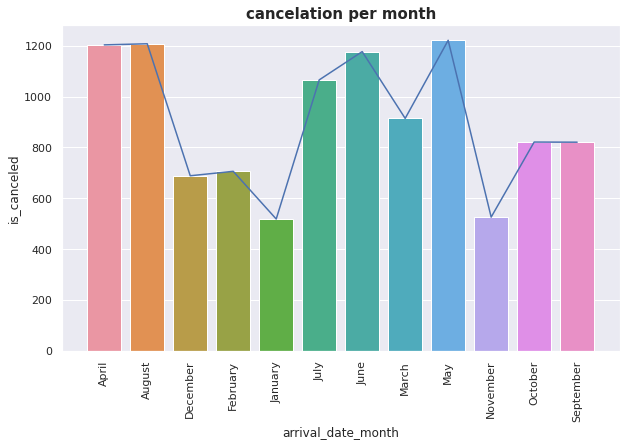

In [68]:
# we are plotting both line and bar graph in same chart by using seaborn and subplot function.
ax=plt.subplots()
ax=sns.barplot(x=cancel_month1.index,y=cancel_month1)
plt.xticks(rotation = 90)
plt.title("cancelation per month",fontweight="bold", size=15)
ax=sns.lineplot(x=cancel_month1.index,y=cancel_month1)
plt.xticks(rotation = 90)
plt.title("cancelation per month",fontweight="bold", size=15)


*  May,June and april witness more no of cancellation.



**9.no of cancellation in each type of hotel**

In [69]:
cancel_df.groupby('hotel')['is_canceled'].count()

hotel
City Hotel      16034
Resort Hotel     7974
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'no. of cancellation in each type of hotel')

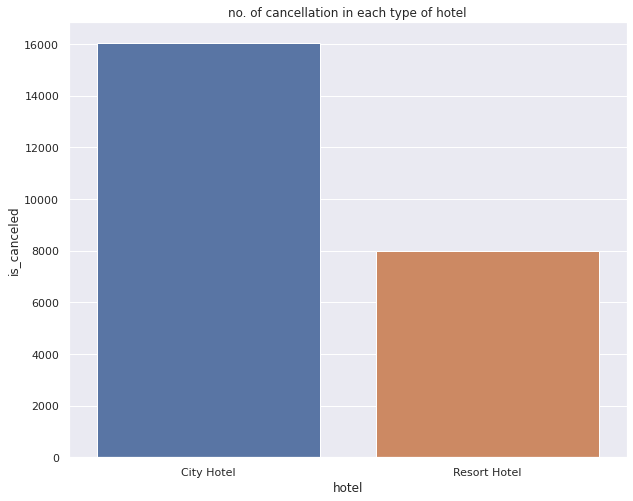

In [70]:
plt.figure(figsize=(10, 8))
sns.barplot(x=cancel_df.groupby('hotel')['is_canceled'].count().index,y=cancel_df.groupby('hotel')['is_canceled'].count())
plt.title('no. of cancellation in each type of hotel')

**10.Which meal type is most preffered meal of customers?**

In [71]:
hotel_df['meal'].value_counts()

BB           67906
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64

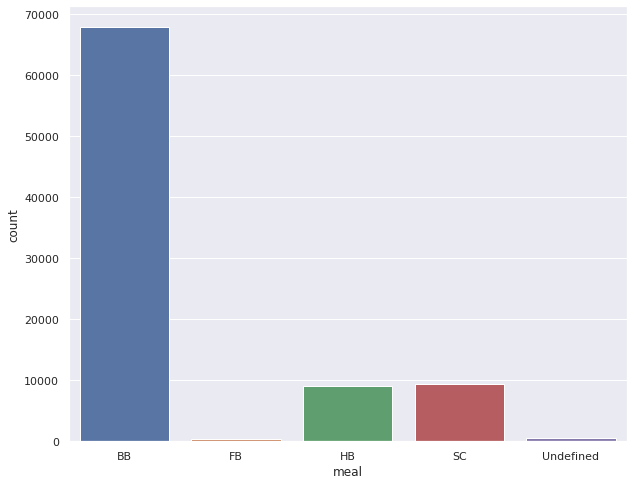

In [72]:
plt.figure( figsize=(10, 8))
sns.countplot(x=hotel_df['meal'])

Most preferred meal type is BB (Bed and breakfast).

###Let's try to answer some question.

**1.What is realtionship between ADR and total stay of guests**

In [73]:
hotel_df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_stay,Total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2


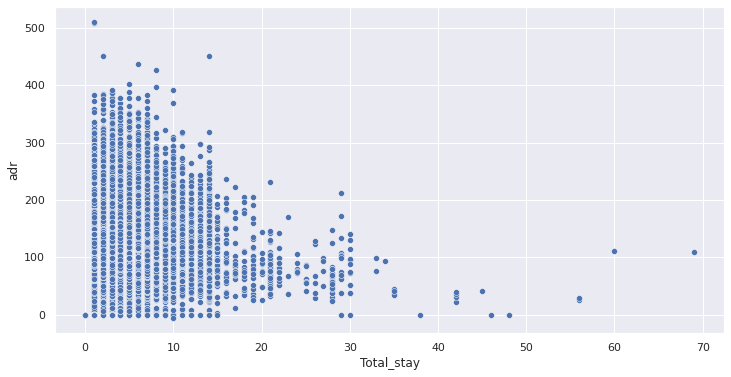

In [74]:
plt.figure(figsize = (12,6))
sns.scatterplot(y='adr',x='Total_stay',data=hotel_df)
plt.show()

There is outlier in adr, so we remove it for better undrstanding.

In [75]:
hotel_df.drop(hotel_df[hotel_df['adr'] > 5000].index, inplace = True)

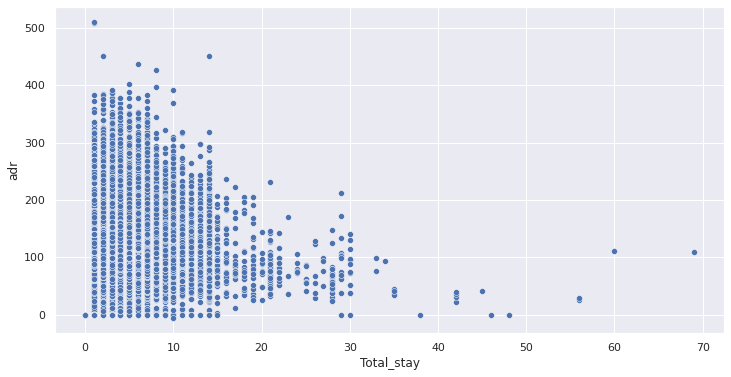

In [76]:
plt.figure(figsize = (12,6))
sns.scatterplot(y='adr',x='Total_stay',data=hotel_df)
plt.show()

From the scatter plot we can see that as length of total_stay increases the adr 
decreases.

**2.Relationship between not getting prefered room and booking cancellation**

In [77]:
def same_room_allotment(x):
    if x['reserved_room_type'] != x['assigned_room_type']:
        return 1
    else:
        return 0

In [78]:
hotel_df['same_room_not_alloted'] = hotel_df.apply(lambda x :same_room_allotment(x), axis = 1)
hotel_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_stay,Total_guests,same_room_not_alloted
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0


In [79]:
not_same_room=hotel_df[hotel_df['same_room_not_alloted']==1]

In [80]:
s1=not_same_room['same_room_not_alloted'].count()
s1

12990

In [81]:
can1=(not_same_room.groupby('is_canceled')['same_room_not_alloted'].count())

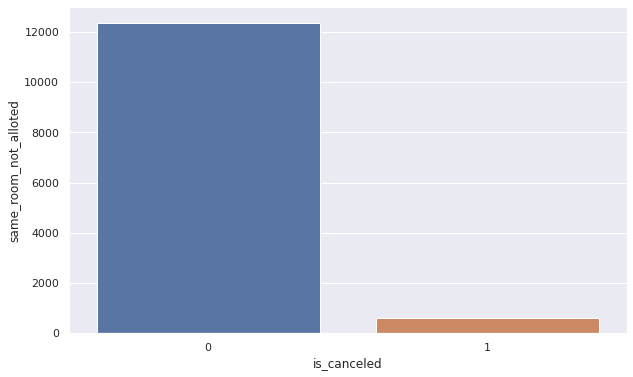

In [82]:
sns.barplot(x=can1.index,y=can1)

* we can see that there is no impact on bookings cancellation even after customers are not getting preferred rooms. There is very slight booking cancellation which is negligible.

**3.Relationship between room allotment and adr**

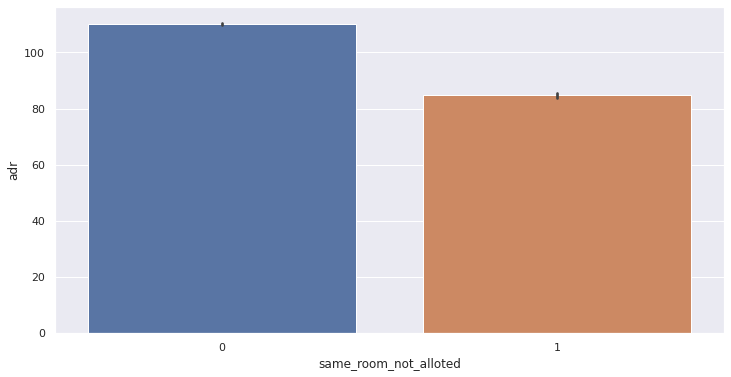

In [83]:
plt.figure(figsize = (12,6))
sns.barplot(y='adr',x='same_room_not_alloted',data=hotel_df)

*  customers who didn't get preferred room, they pay slightly less money.

**4.Relationship between lead time and bookings**

In [84]:
cancel_df=hotel_df[hotel_df.is_canceled==1]
cancel_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_stay,Total_guests,same_room_not_alloted
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,3,2,0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,3,2,0


In [85]:
d=cancel_df.groupby("lead_time")['is_canceled'].count()
d

lead_time
0      346
1      211
2      182
3      170
4      153
      ... 
608      2
615      2
622      2
626      1
629      2
Name: is_canceled, Length: 465, dtype: int64

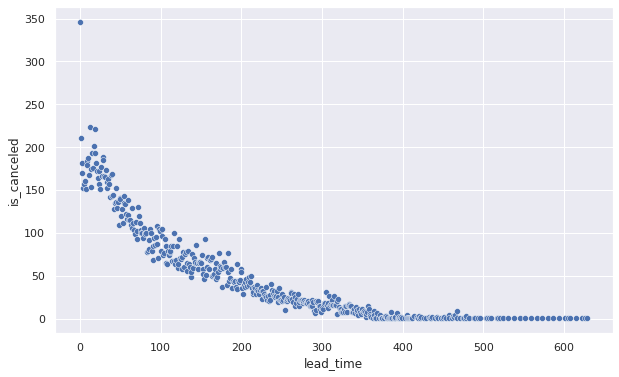

In [86]:
sns.scatterplot(x=d.index,y=d)

* lead time is indirectly proportional to cancellation.
* the more lead time leads to less number of cancellation.

**5.realtionship between Hotel price and arriving months**

In [88]:
booking_df=hotel_df[hotel_df.is_canceled==0]

calculating price for each hotel type

In [102]:
hotel_df['adr_p']=hotel_df['adr']/hotel_df['Total_guests']

resorthotel_df['price']=resorthotel_df['adr']*resorthotel_df['Total_stay']
cityhotel_df['price']=cityhotel_df['adr']*cityhotel_df['Total_stay']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


calculating mean price for each month

In [103]:
p_month=resorthotel_df.groupby('arrival_date_month')['price'].mean()
p_month

arrival_date_month
April        292.099410
August       910.237317
December     211.763613
February     166.999878
January      133.977866
July         775.471706
June         555.321371
March        208.531456
May          337.442467
November     177.426302
October      242.524097
September    488.090752
Name: price, dtype: float64

In [104]:
c_month=cityhotel_df.groupby('arrival_date_month')['price'].mean()
c_month

arrival_date_month
April        352.178370
August       388.770996
December     275.531496
February     260.256497
January      244.262565
July         381.326017
June         352.631024
March        276.384690
May          356.103203
November     267.548999
October      306.305857
September    333.129864
Name: price, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

<Figure size 1800x720 with 0 Axes>

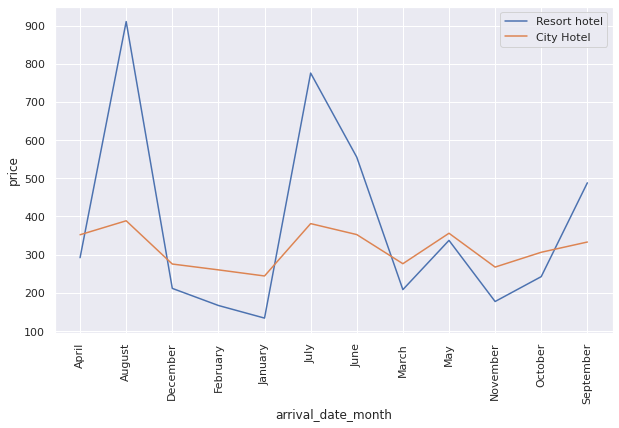

In [109]:
plt.figure(figsize=(25,10))
ax=plt.subplots()
ax=sns.lineplot(x=p_month.index,y=p_month)
ax=sns.lineplot(x=c_month.index,y=c_month)
ax.legend(['Resort hotel','City Hotel'])
plt.xticks(rotation=90)